New Notebook Created by Jupyter MCP Server

# Analysis Notebook
This notebook was created for analysis.

In [1]:
import datetime
print(f"Notebook created on: {datetime.datetime.now()}")

Notebook created on: 2026-01-13 01:31:39.166194


In [2]:
import pandas as pd

# Corrected path relative to the notebook's directory
file_path = '../data/favorita/parquet_data/transactions.parquet'

# Reading the parquet file
df_transactions = pd.read_parquet(file_path)

# Displaying the first few rows and info
print("First 5 rows of transactions:")
display(df_transactions.head())
print("\nDataFrame Info:")
df_transactions.info()

First 5 rows of transactions:


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [3]:
# Path to the stores.parquet file
stores_file_path = '../data/favorita/parquet_data/stores.parquet'

# Reading the parquet file
df_stores = pd.read_parquet(stores_file_path)

# Displaying the first few rows and info
print("First 5 rows of stores:")
display(df_stores.head())
print("\nDataFrame Info:")
df_stores.info()

First 5 rows of stores:


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [4]:
# Re-load transactions to ensure clean state
df_transactions = pd.read_parquet('../data/favorita/parquet_data/transactions.parquet')
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

# Add date features
df_transactions['month'] = df_transactions['date'].dt.month
df_transactions['day'] = df_transactions['date'].dt.day
df_transactions['day_of_week'] = df_transactions['date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Merge with stores data to get store details
df_transactions = df_transactions.merge(df_stores, on='store_nbr', how='left')

# Convert text columns to categorical
categorical_cols = ['city', 'state', 'type']
for col in categorical_cols:
    df_transactions[col] = df_transactions[col].astype('category')

# Display result
print("Processed Transactions Data:")
display(df_transactions.head())
print("\nDataFrame Info:")
df_transactions.info()

Processed Transactions Data:


,date,store_nbr,transactions,month,day,day_of_week,city,state,type,cluster
0,2013-01-01,25,770,1,1,1,Salinas,Santa Elena,D,1
1,2013-01-02,1,2111,1,2,2,Quito,Pichincha,D,13
2,2013-01-02,2,2358,1,2,2,Quito,Pichincha,D,13
3,2013-01-02,3,3487,1,2,2,Quito,Pichincha,D,8
4,2013-01-02,4,1922,1,2,2,Quito,Pichincha,D,9



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
 3   month         83488 non-null  int32         
 4   day           83488 non-null  int32         
 5   day_of_week   83488 non-null  int32         
 6   city          83488 non-null  category      
 7   state         83488 non-null  category      
 8   type          83488 non-null  category      
 9   cluster       83488 non-null  int64         
dtypes: category(3), datetime64[ns](1), int32(3), int64(3)
memory usage: 3.7 MB


## Exploratory Data Analysis (EDA)
Exploring the distribution of transactions, trends over time, and relationships with store features.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Summary statistics
print("Summary Statistics for Transactions:")
display(df_transactions['transactions'].describe())

# Check for missing values
print("\nMissing Values:")
print(df_transactions.isnull().sum())

Summary Statistics for Transactions:


count    83488.000000
mean      1694.602158
std        963.286644
min          5.000000
25%       1046.000000
50%       1393.000000
75%       2079.000000
max       8359.000000
Name: transactions, dtype: float64


Missing Values:
date            0
store_nbr       0
transactions    0
month           0
day             0
day_of_week     0
city            0
state           0
type            0
cluster         0
dtype: int64


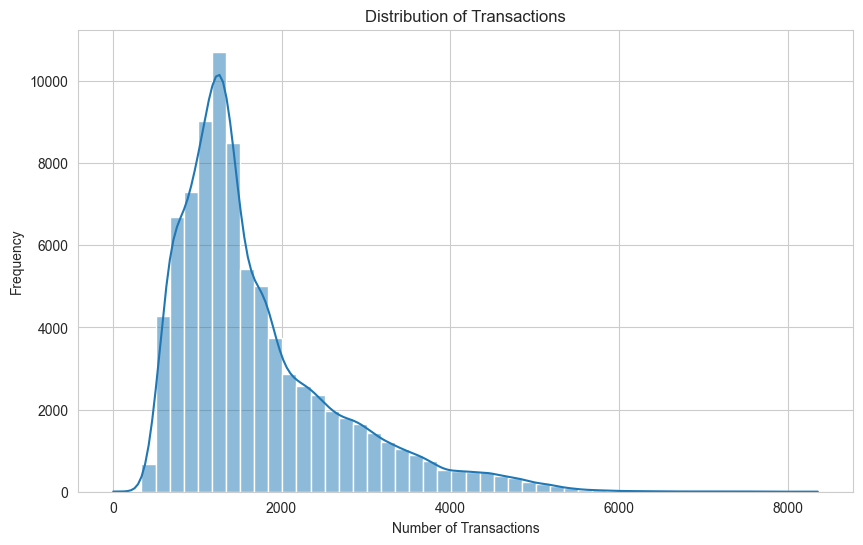

In [6]:
# Distribution of Transactions
plt.figure(figsize=(10, 6))
sns.histplot(df_transactions['transactions'], bins=50, kde=True)
plt.title('Distribution of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

**解读：**
交易量的分布呈右偏态，这表明虽然大多数门店的日交易量处于中等水平（约 1000-2000 之间），但仍有一些日期或门店的交易量显著更高（高达 8000+）。这暗示了存在高绩效门店或销售高峰日。

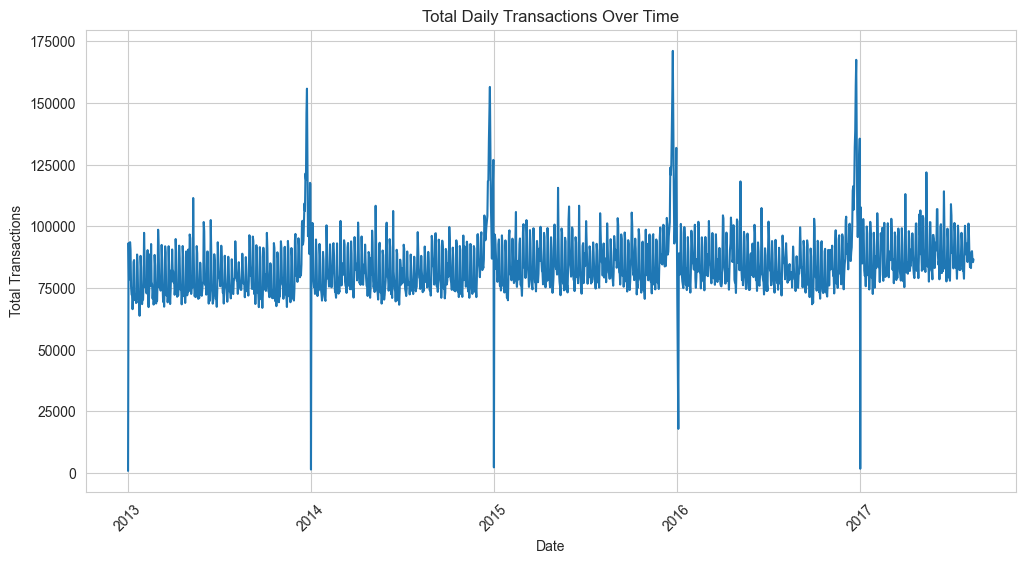

In [7]:
# Transactions over time
df_daily_transactions = df_transactions.groupby('date')['transactions'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily_transactions, x='date', y='transactions')
plt.title('Total Daily Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)
plt.show()

**解读：**
时间序列图显示交易量基线基本保持一致，多年来略有上升趋势。值得注意的是，每年年底都会出现巨大的峰值，这很可能对应于圣诞节和新年的节日购物季。此外，图中还存在周期性的低谷，可能与门店关闭或低客流量日有关。

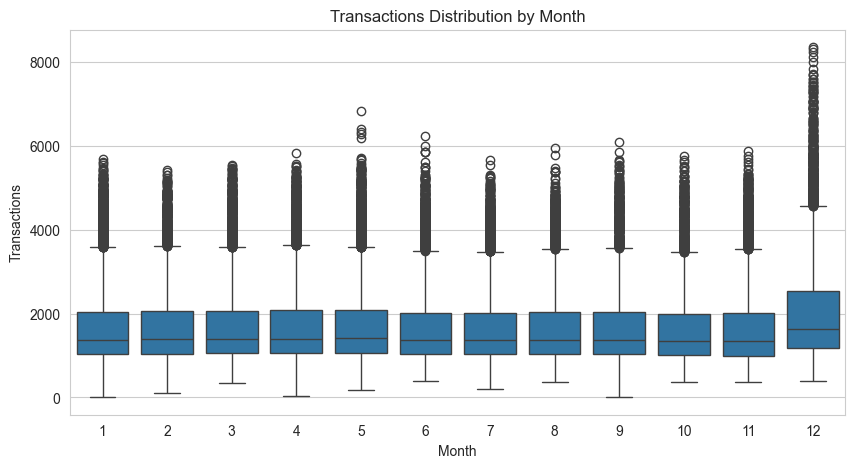

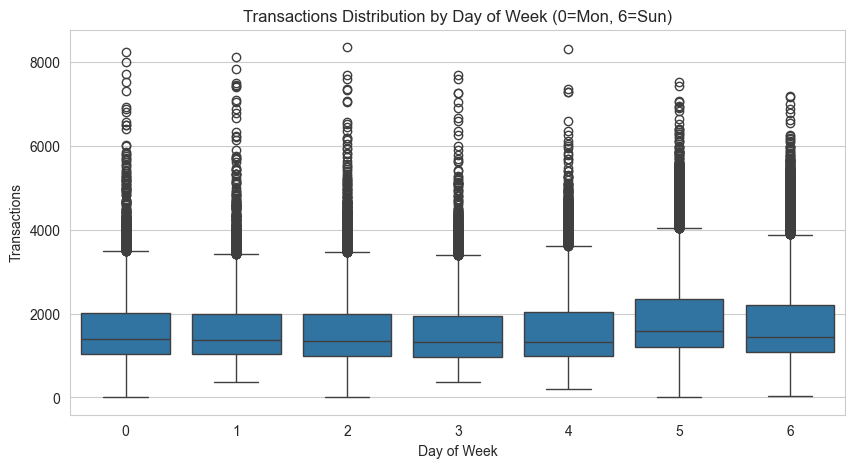

In [8]:
# Transactions by Month
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_transactions, x='month', y='transactions')
plt.title('Transactions Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Transactions')
plt.show()

# Transactions by Day of Week
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_transactions, x='day_of_week', y='transactions')
plt.title('Transactions Distribution by Day of Week (0=Mon, 6=Sun)')
plt.xlabel('Day of Week')
plt.ylabel('Transactions')
plt.show()

**解读：**
*   **月份：** 12 月的交易量中位数明显最高，且波动范围最广，证实了节日季的影响。其他月份相对稳定。
*   **星期：** 与工作日相比，周末（周六和周日，索引 5 和 6）的交易量中位数更高，表明购物活动在周末达到高峰。周一（0）的活跃度也略高于周中。

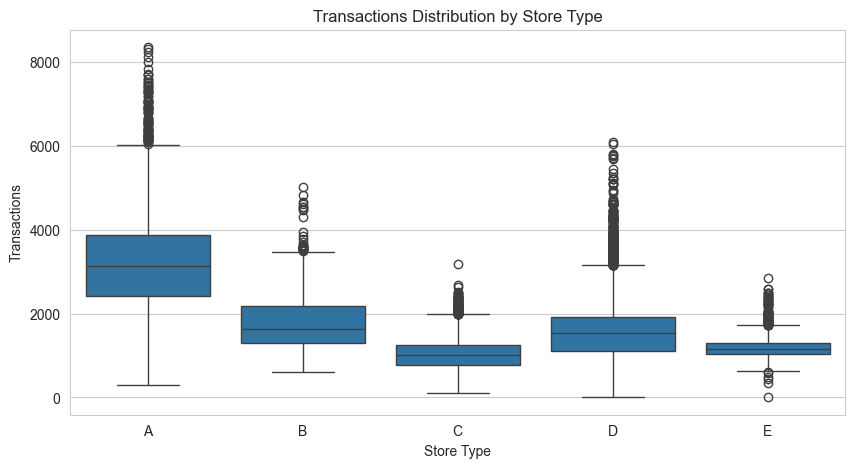

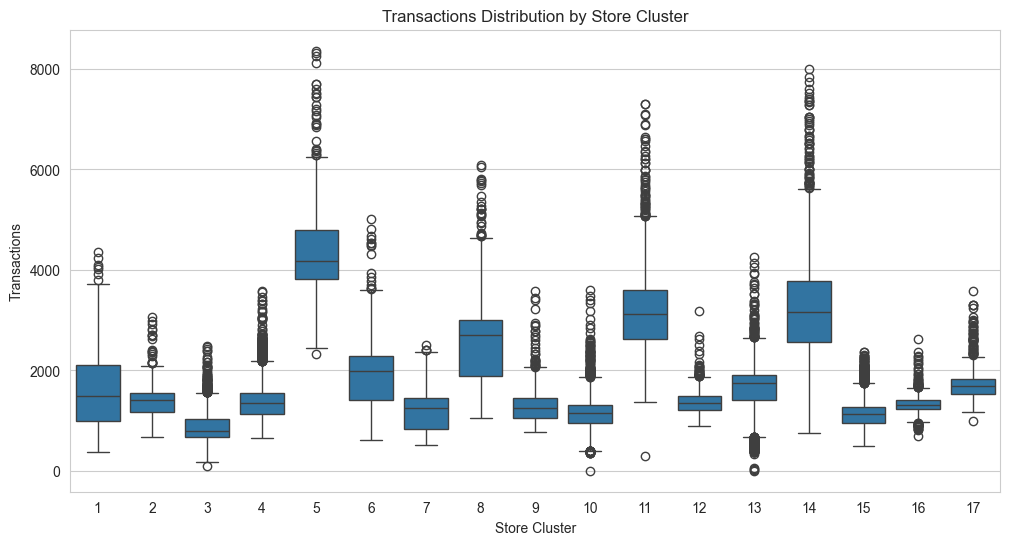

In [9]:
# Transactions by Store Type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_transactions, x='type', y='transactions')
plt.title('Transactions Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Transactions')
plt.show()

# Transactions by Store Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_transactions, x='cluster', y='transactions')
plt.title('Transactions Distribution by Store Cluster')
plt.xlabel('Store Cluster')
plt.ylabel('Transactions')
plt.show()

**解读：**
*   **门店类型：** 与交易量最低的 'C' 型门店相比，'A' 型和 'D' 型门店通常具有更高的交易量中位数。这表明门店类型是影响销售额的一个重要区分因素。
*   **门店聚类：** 某些聚类（如 5、8、11、14）显示出显著更高的交易量，这说明通过这些特征对门店进行分组可以捕捉到客流量方面的实质性差异。

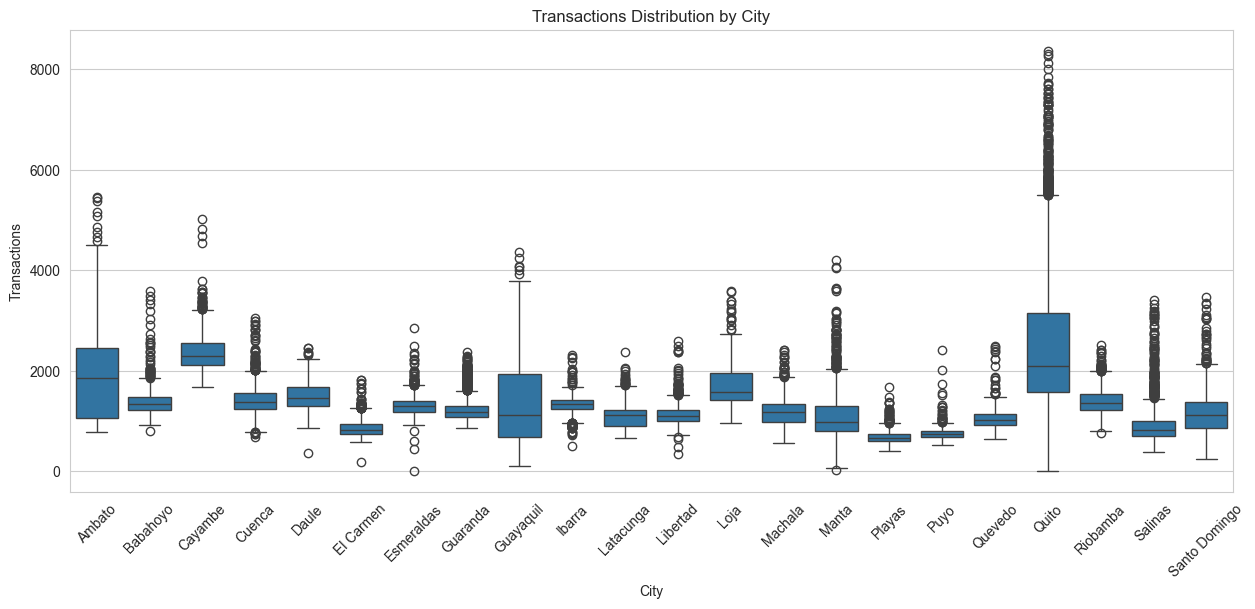

In [10]:
# Transactions by City
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_transactions, x='city', y='transactions')
plt.title('Transactions Distribution by City')
plt.xlabel('City')
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.show()

**解读：**
基多（Quito）不仅拥有最多的门店数量，而且交易量范围也非常广泛，包含了一些极高的离群值。Cayambe 和 Salinas 等其他城市的交易量中位数也较高，而一些较小的城市活跃度则持续偏低。这突显了地理位置在预测销售额时的重要性。

In [1]:
# 加载核心训练数据及辅助数据

import os
import pandas as pd

# 定义数据根目录
DATA_DIR = "data/kaggle/corporacin-favorita-grocery-sales-forecasting_20260112175303/parquet"

# 加载数据集
print("正在加载数据集...")
train = pd.read_parquet(os.path.join(DATA_DIR, "train.parquet"))
items = pd.read_parquet(os.path.join(DATA_DIR, "items.parquet"))
oil = pd.read_parquet(os.path.join(DATA_DIR, "oil.parquet"))
holidays = pd.read_parquet(os.path.join(DATA_DIR, "holidays_events.parquet"))
stores = pd.read_parquet(os.path.join(DATA_DIR, "stores.parquet")) # 重新加载以确保完整性

print(f"Train data shape: {train.shape}")
print(f"Items data shape: {items.shape}")
print(f"Oil data shape: {oil.shape}")
print(f"Holidays data shape: {holidays.shape}")
print(f"Stores data shape: {stores.shape}")

# 展示 Train 数据前几行
print("\nTrain Data Head:")
display(train.head())

正在加载数据集...


FileNotFoundError: [Errno 2] No such file or directory: 'data/kaggle/corporacin-favorita-grocery-sales-forecasting_20260112175303/parquet/train.parquet'

In [2]:
# 检查当前工作目录
import os
print(f"Current Working Directory: {os.getcwd()}")
print(f"Files in ../data/kaggle/.../parquet (Checking relative path from notebook dir):")
try:
    relative_path_check = "../data/kaggle/corporacin-favorita-grocery-sales-forecasting_20260112175303/parquet"
    print(os.listdir(relative_path_check))
except FileNotFoundError:
    print(f"Path not found: {relative_path_check}")

Current Working Directory: /Users/nextchen/Dev/project_pig/a190rithm/notebook
Files in ../data/kaggle/.../parquet (Checking relative path from notebook dir):
['train.parquet', 'stores.parquet', 'test.parquet', 'sample_submission.parquet', 'items.parquet', 'transactions.parquet', 'oil.parquet', 'holidays_events.parquet']
